**Importing the necessary libraries: numpy for array handling, networkx for graph operations, and matplotlib for visualization.**

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

**Adding adjacency matrix using networkx's from_numpy_array method.**

In [14]:
M = np.array([
    [0, 3, 0, 0, 0, 2, 0, 0, 0, 0],
    [3, 0, 17, 16, 0, 0, 0, 0, 0, 0],
    [0, 17, 0, 8, 0, 0, 0, 0, 18, 0],
    [0, 16, 8, 0, 11, 0, 0, 0, 4, 0],
    [0, 0, 0, 11, 0, 1, 6, 5, 10, 0],
    [2, 0, 0, 0, 1, 0, 7, 0, 0, 0],
    [0, 0, 0, 0, 6, 7, 0, 15, 0, 0],
    [0, 0, 0, 0, 5, 0, 15, 0, 12, 13],
    [0, 0, 18, 4, 10, 0, 0, 12, 0, 9],
    [0, 0, 0, 0, 0, 0, 0, 13, 9, 0]
])
G = nx.from_numpy_array(M, create_using=nx.Graph())

**Setting Attributes and Positioning: Node and edge attributes are set for visualization, and the layout for node positioning is calculated and then the distance graph is visualized**

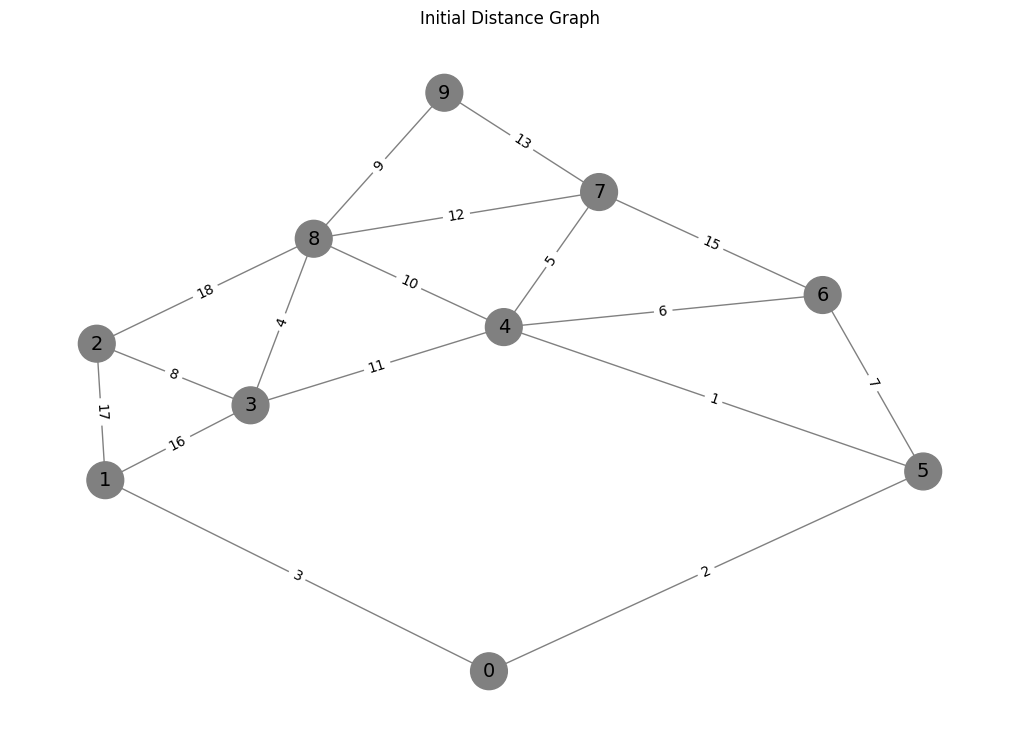

In [16]:
# Setting node and edge attributes for visualization
pos = nx.spring_layout(G)  # positions for all nodes
nx.set_node_attributes(G, 'grey', 'color')
nx.set_edge_attributes(G, 'grey', 'color')

# Function to draw the intial distance graph
def draw_graph(G, pos, title="Graph"):
    colors = [G.nodes[n]['color'] for n in G.nodes]
    edge_colors = [G[u][v]['color'] for u, v in G.edges]
    labels = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, node_color=colors, edge_color=edge_colors, node_size=700, font_size=14)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(title)
    plt.show()
draw_graph(G, pos, "Initial Distance Graph")


**Calculating shortest paths from vertex 0 to all other vertices using Dijkstra's algorithm**

In [18]:
shortest_paths = nx.single_source_dijkstra_path_length(G, source=0)
print("Shortest paths from vertex 0 to all other vertices:", shortest_paths)

all_pairs_shortest_paths = dict(nx.all_pairs_dijkstra_path_length(G))
print("All pairs shortest paths:", all_pairs_shortest_paths)

shortest_path = nx.single_source_dijkstra_path(G, source=0)
print("Shortest path from vertex 0 to all other vertices:", shortest_path)

Shortest paths from vertex 0 to all other vertices: {0: 0, 5: 2, 1: 3, 4: 3, 7: 8, 6: 9, 8: 13, 3: 14, 2: 20, 9: 21}
All pairs shortest paths: {0: {0: 0, 5: 2, 1: 3, 4: 3, 7: 8, 6: 9, 8: 13, 3: 14, 2: 20, 9: 21}, 1: {1: 0, 0: 3, 5: 5, 4: 6, 7: 11, 6: 12, 3: 16, 8: 16, 2: 17, 9: 24}, 2: {2: 0, 3: 8, 8: 12, 1: 17, 4: 19, 0: 20, 5: 20, 9: 21, 7: 24, 6: 25}, 3: {3: 0, 8: 4, 2: 8, 4: 11, 5: 12, 9: 13, 0: 14, 1: 16, 7: 16, 6: 17}, 4: {4: 0, 5: 1, 0: 3, 7: 5, 6: 6, 1: 6, 8: 10, 3: 11, 9: 18, 2: 19}, 5: {5: 0, 4: 1, 0: 2, 1: 5, 7: 6, 6: 7, 8: 11, 3: 12, 9: 19, 2: 20}, 6: {6: 0, 4: 6, 5: 7, 0: 9, 7: 11, 1: 12, 8: 16, 3: 17, 9: 24, 2: 25}, 7: {7: 0, 4: 5, 5: 6, 0: 8, 6: 11, 1: 11, 8: 12, 9: 13, 3: 16, 2: 24}, 8: {8: 0, 3: 4, 9: 9, 4: 10, 5: 11, 7: 12, 2: 12, 0: 13, 6: 16, 1: 16}, 9: {9: 0, 8: 9, 7: 13, 3: 13, 4: 18, 5: 19, 2: 21, 0: 21, 6: 24, 1: 24}}
Shortest path from vertex 0 to all other vertices: {0: [0], 1: [0, 1], 5: [0, 5], 4: [0, 5, 4], 6: [0, 5, 6], 2: [0, 1, 2], 3: [0, 5, 4, 3], 7: [0

**The shortest path from vertex 0 to vertex 9 is plotted and visualized by changing the colors of the nodes and distance with shortest path calculated.**

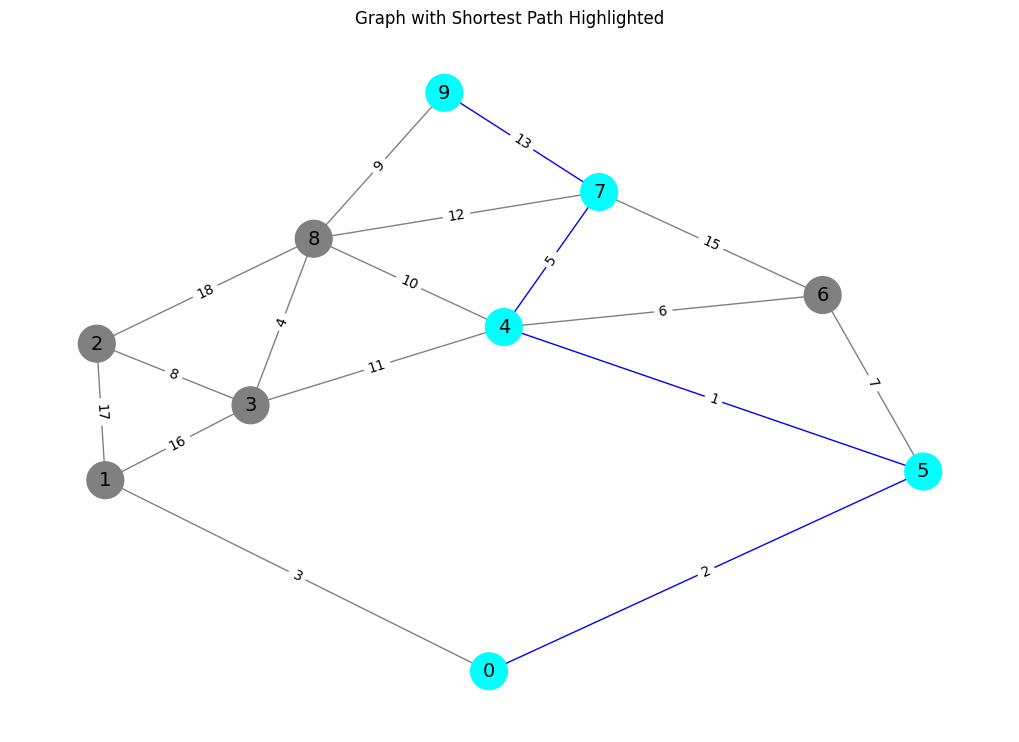

In [24]:
path_to_highlight = shortest_path[9]  # Path to vertex 9 (corresponding to vertex 10 in R)

# Changing color of the nodes and edges in the shortest path
for node in path_to_highlight:
    G.nodes[node]['color'] = 'cyan'

for i in range(len(path_to_highlight) - 1):
    u, v = path_to_highlight[i], path_to_highlight[i + 1]
    G[u][v]['color'] = 'blue'

# Drawing the graph with the highlighted shortest path
draw_graph(G, pos, "Graph with Shortest Path Highlighted")